<h1 align='center'><font color='MidnightBlue'>Credit EDA Assignment: Risk Analytics On Bank Loan Defaulters</font></h1>

# <font color='Chocolate'>1. Business Understanding</font>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample.

2. **All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

- **Approved**: The Company has approved loan Application

- **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# <font color='Chocolate'>2. Business Objectives</font>
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Data Understanding

This dataset has 3 files as explained below: 
1. **'application_data.csv'** contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
2. **'previous_application.csv'** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. **'columns_description.csv'** is data dictionary which describes the meaning of the variables.

### Importing necessary modules

In [1]:
# Ignore warning message
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# <font color='Chocolate'>3. Current Loan Application Data Analysis</font>

## <font color='Chocolate'>3.1 Reading the dataset - Application data</font>

In [3]:
application_data = pd.read_csv('application_data.csv')

In [4]:
# Inspect application dataset
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## <font color='Chocolate'>3.2 Inspect Application Dataset information and its data types</font>

In [5]:
# Application dataset
application_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Check dataframes shape
print(application_data.shape)

(307511, 122)


From Application dataset, we have total of **307511 rows and 122 columns** out of which we have:
- **65 columns with Float datatype**
- **41 columns with Int datatype**
- **16 columns with Object datatype**

## <font color='Chocolate'>3.3 Handling Missing Data</font>

Check the columns having missing data or NULL values in application dataset.

In [7]:
# Defining a function to check the columns having NULL values:
#     1. Get the dataset/dataframe as an input.
#     2. Calculate the percentage of the missing data to the associated columns in the given dataset.
#     3. Return the result in a Pandas "Series" type having column names as index and percentage missing value as data.
def columns_missing_data(dataset):
    result = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending=False)
    return result[result > 0]

In [8]:
missing_application_data = columns_missing_data(application_data)

In [9]:
print(f"Columns having missing/NULL data in Application dataset:\n\n{missing_application_data}")

Columns having missing/NULL data in Application dataset:

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE 

In [10]:
rejected_columns = missing_application_data[missing_application_data>=45].index.to_list()

In [11]:
print(rejected_columns, f'Total Rejected columns: {len(rejected_columns)}',sep='\n\n')

['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE

#### Observation:
From the above inspection on missing data, we can see that we have total of 49 columns having missing data of more than 45% dataset and none of these columns doesn't provide any impact for our further analysis and won't make any sense to have it. Hence we can safely drop these columns.

**Columns that can be dropped:**<br>
'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'

## <font color='Chocolate'>3.3.1 Drop rejected columns (Dataset with more than 45% missing values)</font>

In [12]:
# Drop rejected columns
application_data_refined = application_data.drop(labels = rejected_columns, axis=1)

In [13]:
# Checking the shape after dropping rejected columns
application_data_refined.shape

(307511, 73)

In [14]:
# Check new Application dataset info
application_data_refined.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## <font color='Chocolate'>3.3.2 Impute Missing values</font>

Check the remaining columns in application dataset having missing data. 

In [15]:
# Check other columns with less missing data in application dataset
remaining_missing_data = columns_missing_data(application_data_refined)
print(remaining_missing_data)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


In [16]:
# Check the variables data types having missing values
application_data_refined[remaining_missing_data.index].dtypes

OCCUPATION_TYPE                object
EXT_SOURCE_3                  float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
NAME_TYPE_SUITE                object
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
EXT_SOURCE_2                  float64
AMT_GOODS_PRICE               float64
AMT_ANNUITY                   float64
CNT_FAM_MEMBERS               float64
DAYS_LAST_PHONE_CHANGE        float64
dtype: object

#### Observation:
We have two types of variables having missing data:
- **Categorical variables:** OCCUPATION_TYPE, NAME_TYPE_SUITE
- **Numeric variables:** EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE

Out of these we will be imputing the values for the below columns:
1. **OCCUPATION_TYPE:** We have around 31% missing data for this variable. So, we will be imputing these missing values as "Unknown" category.
2. **NAME_TYPE_SUITE:** We will be imputing the missing values with mode since the missing data percentage is very less (0.42%).
3. **AMT_GOODS_PRICE:** We will be imputing with Mean or Median based on the observation.
4. **AMT_ANNUITY:** We will be imputing with Mean or Median based on the observation.

We will ignore the rest other variables with missing data. It is better to have NULL rather than exaggerating the data and affect further analysis.

#### OCCUPATION_TYPE Variable

Replace the missing/NULL values with "Unknown" value.

In [17]:
application_data_refined['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [18]:
# Check NULL values in OCCUPATION_TYPE variable
application_data_refined['OCCUPATION_TYPE'].isnull().sum()

0

#### NAME_TYPE_SUITE Variable

Here we will replace the value with Mode

In [19]:
# Check the most frequent value present
application_data_refined['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [20]:
most_freq_val = application_data_refined['NAME_TYPE_SUITE'].mode()[0]
most_freq_val

'Unaccompanied'

In [21]:
# Replace NUll with most frequent value
application_data_refined['NAME_TYPE_SUITE'].fillna(most_freq_val, inplace=True)

In [22]:
# Check NULL values in NAME_TYPE_SUITE variable
application_data_refined['NAME_TYPE_SUITE'].isnull().sum()

0

#### AMT_GOODS_PRICE Variable

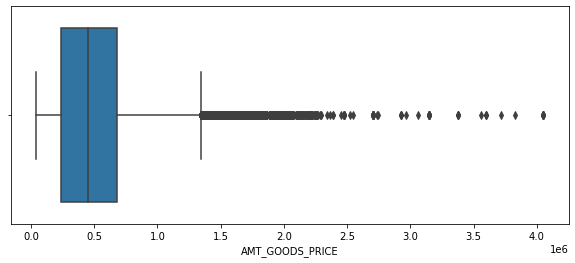

In [23]:
# Check if outliers exists
plt.figure(figsize=(10,4))
sns.boxplot(application_data_refined['AMT_GOODS_PRICE'])
plt.show()

Clearly we can see that outliers are present in this variable. Hence it is better to replace NULL value with median.

In [24]:
amt_goods_price_median = application_data_refined['AMT_GOODS_PRICE'].median()
amt_goods_price_median

450000.0

In [25]:
application_data_refined['AMT_GOODS_PRICE'].fillna(amt_goods_price_median, inplace=True)

In [26]:
# Check NULL values in AMT_GOODS_PRICE variable
application_data_refined['AMT_GOODS_PRICE'].isnull().sum()

0

#### AMT_ANNUITY Variable

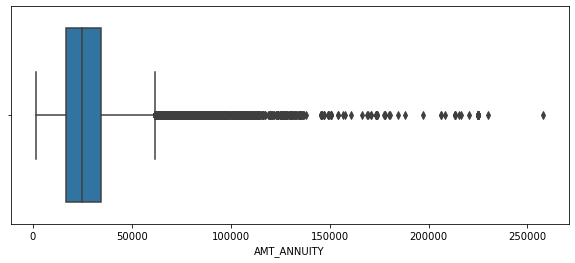

In [27]:
# Check if outliers exists
plt.figure(figsize=(10,4))
sns.boxplot(application_data_refined['AMT_ANNUITY'])
plt.show()

Clearly we can see that outliers are present in this variable. Hence it is better to replace NULL value with median.

In [28]:
amt_annuity_median = application_data_refined['AMT_ANNUITY'].median()
amt_annuity_median

24903.0

In [29]:
application_data_refined['AMT_ANNUITY'].fillna(amt_annuity_median, inplace=True)

In [30]:
# Check NULL values in AMT_GOODS_PRICE variable
application_data_refined['AMT_ANNUITY'].isnull().sum()

0

#### Result:
We have treated the missing data for the important columns either by dropping or imputing the values with suitable methods in the application dataset.

## <font color='Chocolate'>3.4 Handling Outliers</font>

Check 'n' number of unique values for each variable and identify the potential variables that might have outliers.

In [31]:
# Check the number of unique values for each variable
application_data_refined.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

#### Observation:

We have large number of unique values for **EXT_SOURCE_2, EXT_SOURCE_3, AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_CREDIT AND AMT_ANNUITY** variables which are continuous in nature. Now we need to check whether the outliers persists in these variables.

In [32]:
# Define a function to plot boxplot for identifying outliers of continuous variables
def boxplot_outlier(df, labels):
    plt.figure(figsize=(15,10))
    i, j = len(labels) / 3 + 1, 3
    for index, column in enumerate(labels):
        plt.subplot(i, j, index+1)
        sns.boxplot(df[column])
    plt.show()

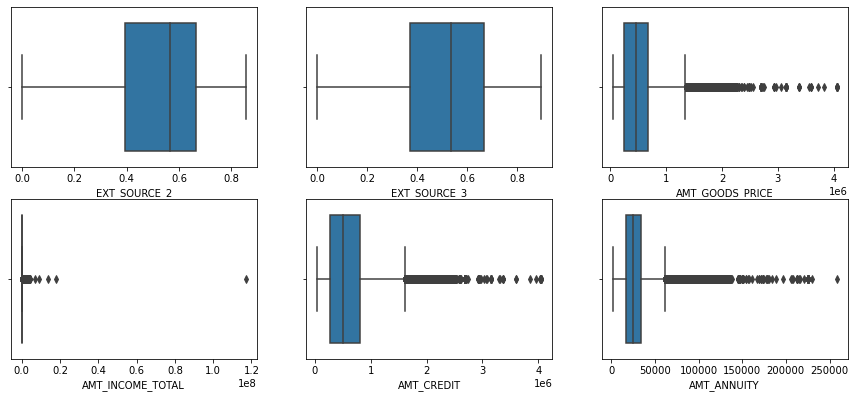

In [33]:
labels = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
boxplot_outlier(application_data_refined, labels)

#### Observation:
From the above plots, we can see the outliers for the following variables:
1. **AMT_GOODS_PRICE**
2. **AMT_INCOME_TOTAL**
3. **AMT_CREDIT**
4. **AMT_ANNUITY**

Let's observe each quantile value for each of the above variables and handle it accordingly.

In [34]:
amt_goods_price_quantile = np.quantile(application_data_refined['AMT_GOODS_PRICE'],[0.75, 0.99, 1])
amt_income_total_quantile = np.quantile(application_data_refined['AMT_INCOME_TOTAL'],[0.75, 0.99, 1])
amt_credit_quantile = np.quantile(application_data_refined['AMT_CREDIT'],[0.75, 0.99, 1])
amt_annuity_quantile = np.quantile(application_data_refined['AMT_ANNUITY'],[0.75, 0.99, 1])
print(amt_goods_price_quantile, amt_income_total_quantile, amt_credit_quantile, amt_annuity_quantile, sep='\n')

[ 679500. 1800000. 4050000.]
[2.025e+05 4.725e+05 1.170e+08]
[ 808650. 1854000. 4050000.]
[ 34596.   70006.5 258025.5]


We can clearly state that there is a huge difference between 99th percentile and max value for <font color='Red'>**AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY**</font> variables. We can safely drop the records which falls outside of 99th percentile for these variables.

In [35]:
amt_goods_price_99 = np.quantile(application_data_refined['AMT_GOODS_PRICE'],0.99)
amt_income_tot_99 = np.quantile(application_data_refined['AMT_INCOME_TOTAL'],0.99)
amt_credit_99 = np.quantile(application_data_refined['AMT_CREDIT'],0.99)
amt_annuity_99 = np.quantile(application_data_refined['AMT_ANNUITY'],0.99)
print(amt_goods_price_99, amt_income_tot_99, amt_credit_99, amt_annuity_99, sep='\n')

1800000.0
472500.0
1854000.0
70006.5


In [36]:
application_data_refined = application_data_refined[application_data_refined['AMT_GOODS_PRICE'] <= amt_goods_price_99]
application_data_refined = application_data_refined[application_data_refined['AMT_INCOME_TOTAL'] <= amt_income_tot_99]
application_data_refined = application_data_refined[application_data_refined['AMT_CREDIT'] <= amt_credit_99]
application_data_refined = application_data_refined[application_data_refined['AMT_ANNUITY'] <= amt_annuity_99]

In [37]:
application_data_refined.shape

(299701, 73)

**Records count drops from 307511 to 298876.**

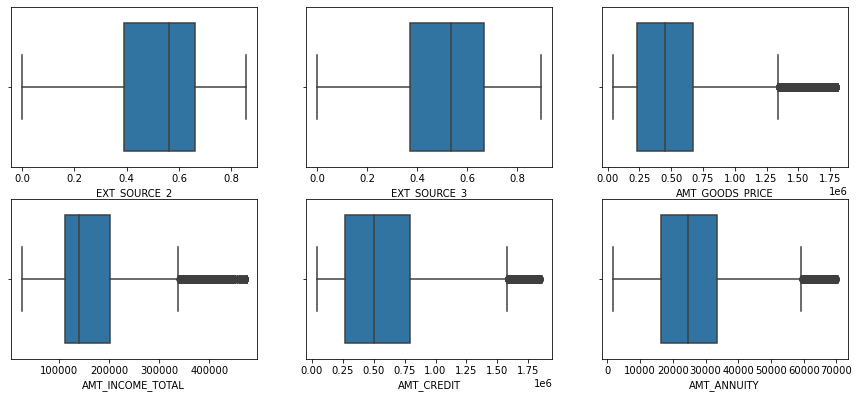

In [38]:
# Check the outliers for the continuous variables post records deletion
boxplot_outlier(application_data_refined, labels)

#### Result:
Although the above plots still contains outliers even after we deleted some records, it is still continuous in nature. Hence these can be treated as normal values.

## <font color='Chocolate'>3.5 Standardise the values</font>

Let us observe the unique values for 'CODE_GENDER' categorical variable.

In [39]:
# Check the unique values for Gender categorical variable
application_data_refined['CODE_GENDER'].value_counts()

F      198228
M      101469
XNA         4
Name: CODE_GENDER, dtype: int64

We have unique values as **'F', 'M' and 'XNA'.** Now we will be doing the following:
- Replace **'F'** and **'M'** with proper notation as **'Female'** and **'Male'**.
- Replace **'XNA'** with **'Unknown'** value as it doesn't make any sense.
- Rename **'CODE_GENDER'** variable to **'GENDER'**

In [40]:
application_data_refined['CODE_GENDER'] = application_data_refined['CODE_GENDER'].apply(lambda x: x.replace('M','Male'))
application_data_refined['CODE_GENDER'] = application_data_refined['CODE_GENDER'].apply(lambda x: x.replace('F','Female'))
application_data_refined['CODE_GENDER'] = application_data_refined['CODE_GENDER'].apply(lambda x: x.replace('XNA','Unknown'))
application_data_refined.rename(columns = {'CODE_GENDER':'GENDER'}, inplace=True)

In [41]:
# Cross Check the unique values for Gender categorical variable after new changes
application_data_refined['GENDER'].value_counts()

Female     198228
Male       101469
Unknown         4
Name: GENDER, dtype: int64

In [42]:
application_data_refined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Result:
We have standardised the values with proper notations for Gender variable and now gives meaningful categories.

## <font color='Chocolate'>3.6 Fix Invalid values</font>

In [43]:
days_variables = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
application_data_refined[days_variables].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


#### Observation:
- From the dataset we can see that we have negative values for days variables i.e., <font color='RED'>**'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'**</font>.
- We cannot have the no. of days in negative. So, we have to convert these to absolute values.

In [44]:
# Convert all the negative values to positive
application_data_refined[days_variables] = abs(application_data_refined[days_variables])

In [45]:
application_data_refined[days_variables].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


#### Result:
We have now successfully converted the above mentioned variables to positive values and looks valid.

## <font color='Chocolate'>3.7 Data Imbalance</font>

Now let us check the data imbalance for the **Target** Variable.

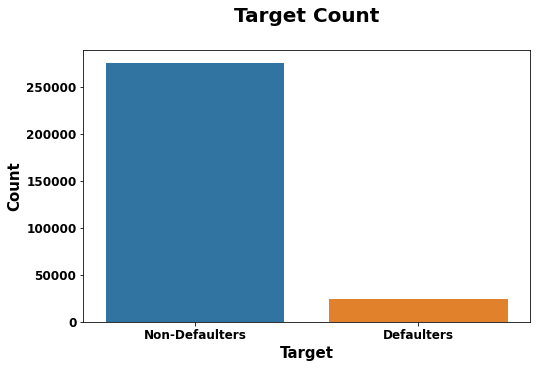

In [46]:
plt.figure(figsize=(8,5))

sns.countplot(data=application_data_refined, x='TARGET')
#Title
plt.title('Target Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Target', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
ticks = [0,1]
labels = ['Non-Defaulters','Defaulters']
plt.xticks(ticks, labels, fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

In [47]:
print(round((100 * application_data_refined['TARGET'].value_counts(normalize=True)),2).sort_values(ascending=False))

0    91.84
1     8.16
Name: TARGET, dtype: float64


#### Observation:
We can clearly see that there is high data imbalance between **Defaulters** and **Non-Defaulters**. We have 91.82% clients marked as **Non-defaulters** and rest 8.18% marked as **Defaulters**.

## <font color='Chocolate'>3.8 Univariate and Segmented Univariate Analysis</font>

We are going to analyze single data variable with respect to Target variable and identify the patterns/trends of it.
- 3.8.1 Type of Loan
- 3.8.2 Client Educational background
- 3.8.3 Client Occupation and Organization background
- 3.8.4 Client Status Information
- 3.8.5 Client Asset details
- 3.8.6 Age group

Let us create a new categorical variable to define meaningful name for Target variable
- 0: Non-Defaulter
- 1: Defaulter

In [48]:
application_data_refined['TARGET_NAME'] = application_data_refined['TARGET'].apply(lambda x:"Defaulter" if x==1 else "Non-Defaulter")

In [49]:
application_data_refined['TARGET_NAME'].value_counts(normalize=True)

Non-Defaulter    0.918352
Defaulter        0.081648
Name: TARGET_NAME, dtype: float64

Let us create two separate datatesets for defaulters and non-defaulters.

In [50]:
# Split the dataset into two datasets one with defaulter and another with non-defaulter.
defaulter_app_data = application_data_refined[application_data_refined['TARGET'] == 1]
nondefaulter_app_data = application_data_refined[application_data_refined['TARGET'] == 0]
print(defaulter_app_data.shape)
print(nondefaulter_app_data.shape)

(24470, 74)
(275231, 74)


## <font color='Chocolate'>3.8.1 Type of Loan</font>
- Let us plot a graph to observe the trend of type of loan applied. 
- Use countplot to check the number of clients approved for each loan type for Defaulters and Non-Defaulters.

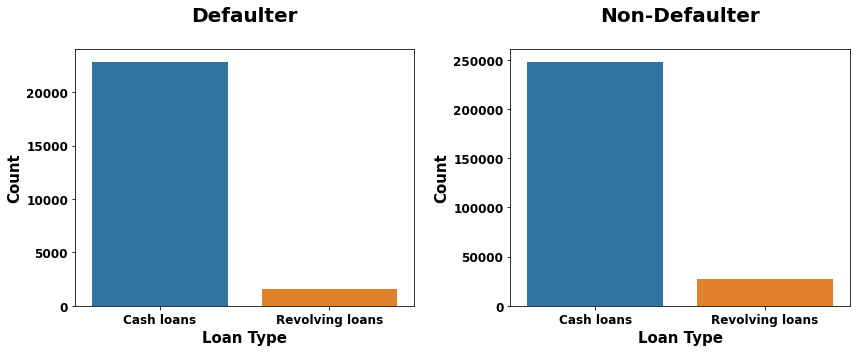

In [51]:
fig = plt.figure(figsize=(12,5))

# Defaulter
plt.subplot(1,2,1)
sns.countplot(data=defaulter_app_data, x='NAME_CONTRACT_TYPE')
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Loan Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Non-Defaulter
plt.subplot(1,2,2)
sns.countplot(data=nondefaulter_app_data, x='NAME_CONTRACT_TYPE')
#Title
plt.title('Non-Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Loan Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

#### Observation:
We can clearly see that most of the clients prefers applying for cash loans than revolving loans.

## <font color='Chocolate'>3.8.2 Client Educational background</font>
Let's analyze the dataset who falls most under what type of class under Education background with respect to Target variable.
- NAME_EDUCATION_TYPE (Categorical Ordered Variable)


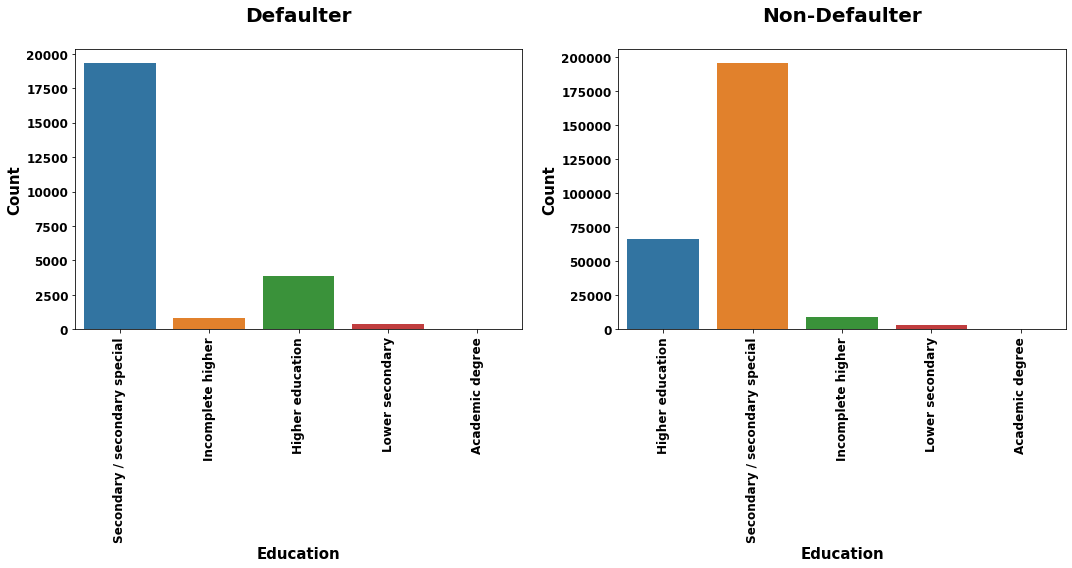

In [52]:
# Plotting countplot for education type variable with respect to target variable.
fig = plt.figure(figsize=(15,8))

# Defaulter
plt.subplot(1,2,1)
sns.countplot(data=defaulter_app_data, x='NAME_EDUCATION_TYPE')
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Education', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Non-Defaulter
plt.subplot(1,2,2)
sns.countplot(data=nondefaulter_app_data, x='NAME_EDUCATION_TYPE')
#Title
plt.title('Non-Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Education', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

#### Observation:
We can see that most of the clients who cleared bank loans have pursued secondary education followed by higher education.

## <font color='Chocolate'>3.8.3 Client Occupation and Organization background</font>

### Occupation Background
Since we have vast number of unique classes under occupation type, we will consider top 10 classes and observe its trends.

In [53]:
occupation_types = application_data_refined['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).head(11)
# Ignoring Unknown category as it misleads analysis
top_occupation_types = occupation_types[~(occupation_types.index == 'Unknown')]

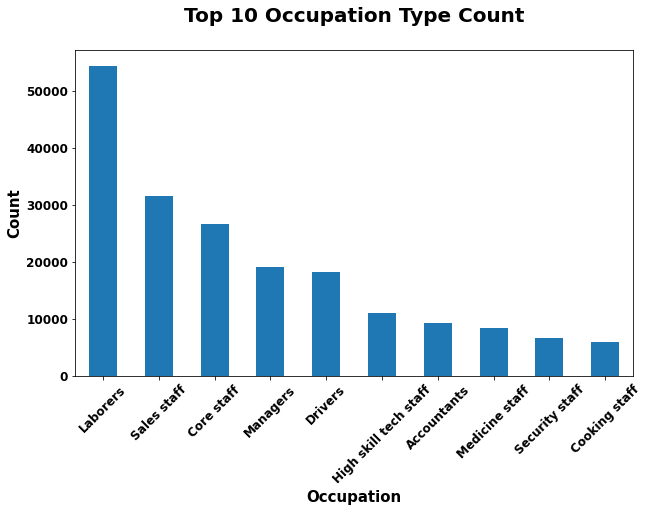

In [54]:
plt.figure(figsize=(10,6))

top_occupation_types.plot.bar()
#Title
plt.title('Top 10 Occupation Type Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Occupation', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=45,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

#### Observation:
We have most of the clients with Occupation as **Laborers** from top 10 list who shown more interest for loan followed by **Sales staff**, **Core staff** and **Managers**.

### Organization Background

Let us plot the graph for different organization backgrounds and observe the trends of it. Similar to occupation, we have vast number of classes within organizations and we will consider top 10 classes and plot the graph.

In [55]:
organization_types = application_data_refined['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False).head(11)
# Ignoring XNA which is unknown category and misleads analysis
top_organization_types = organization_types[~(organization_types.index == 'XNA')]

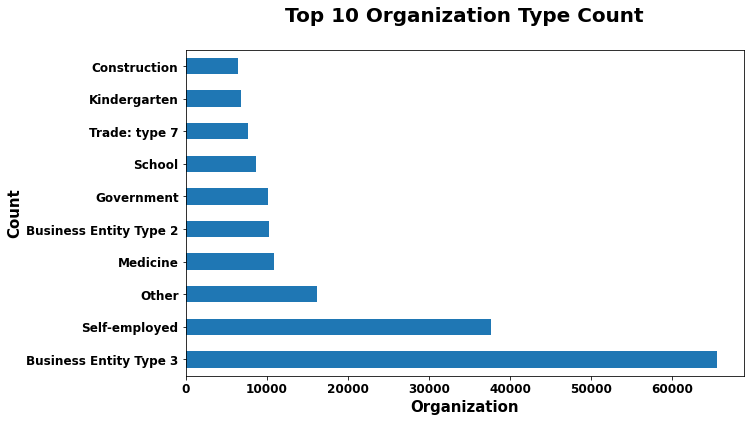

In [56]:
plt.figure(figsize=(10,6))

top_organization_types.plot.barh()
#Title
plt.title('Top 10 Organization Type Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Organization', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.show()

#### Observation:
We have most of the clients belongs to **Business Entity Type 3** class from top 10 list who shown more interest for loan followed by **Self-employed**.

## <font color='Chocolate'>3.8.4 Client Status Information</font>

We are going to explore more on clients income source type, marital status and residency type. Using plots we try to derive more insights and observe which class contains more no. of clients.

### Client Income Type
Plot the graph for Income type (NAME_INCOME_TYPE) variable with respect to Target variable and check the top class with more number of clients.

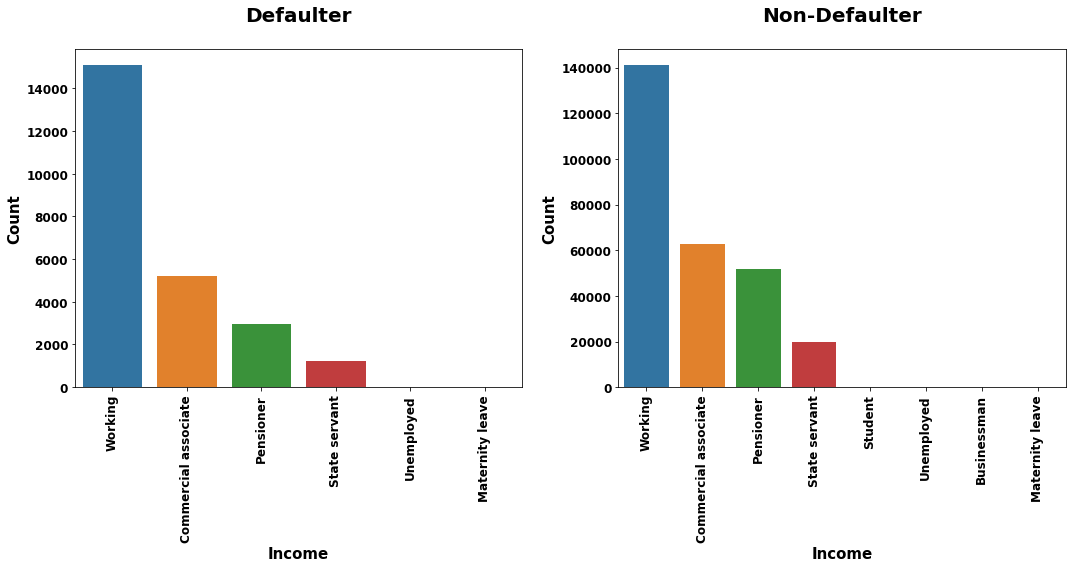

In [57]:
#Plot countplot for NAME_INCOME_TYPE w.r.t. Target variable
fig = plt.figure(figsize=(15,8))

# Defaulters
plt.subplot(1,2,1)
order_def = defaulter_app_data['NAME_INCOME_TYPE'].value_counts(ascending=False).index
sns.countplot(data=defaulter_app_data, x='NAME_INCOME_TYPE', order=order_def)
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Income', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Non-Defaulters
plt.subplot(1,2,2)
order_nondef = nondefaulter_app_data['NAME_INCOME_TYPE'].value_counts(ascending=False).index
sns.countplot(data=nondefaulter_app_data, x='NAME_INCOME_TYPE', order=order_nondef)
#Title
plt.title('Non-Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Income', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

#### Observation:
- Most of clients (both defaulters and non-defaulters) belongs to **"Working** group.
- Next best group/class is **Commercial associate** followed by **Pensioner** and **State servant**.
- Very few clients falls under **Unemployed, student, businessman and Maternity leave** groups.

### Client Marital Status
Plot the graph for Marital status (NAME_FAMILY_STATUS) variable with respect to Target variable and observe its trends.

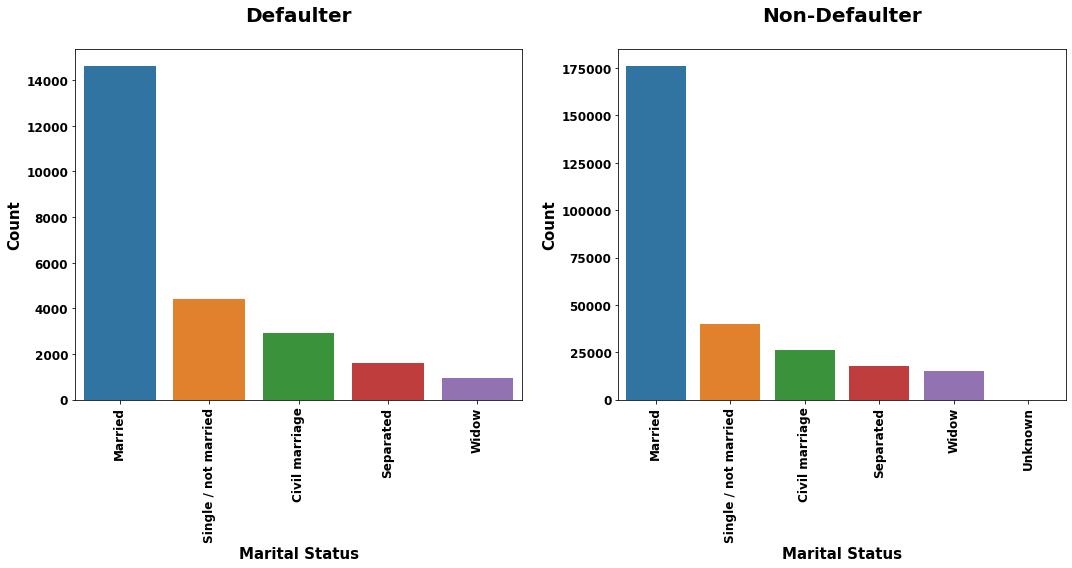

In [58]:
#Plot countplot for NAME_FAMILY_STATUS w.r.t. Target variable
fig = plt.figure(figsize=(15,8))

# Defaulters
plt.subplot(1,2,1)
order_def = defaulter_app_data['NAME_FAMILY_STATUS'].value_counts(ascending=False).index
sns.countplot(data=defaulter_app_data, x='NAME_FAMILY_STATUS', order=order_def)
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Marital Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Non-Defaulters
plt.subplot(1,2,2)
order_nondef = nondefaulter_app_data['NAME_FAMILY_STATUS'].value_counts(ascending=False).index
sns.countplot(data=nondefaulter_app_data, x='NAME_FAMILY_STATUS', order=order_nondef)
#Title
plt.title('Non-Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Marital Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

#### Observation:
- Most of the clients (Defaulters and Non-Defaulters) are **Married**.
- Next best group is **Single** followed by **Civil marriage**.

### Client Residency type
Plot the graph for Residency type (NAME_HOUSING_TYPE) variable with respect to Target variable and observe its trends.

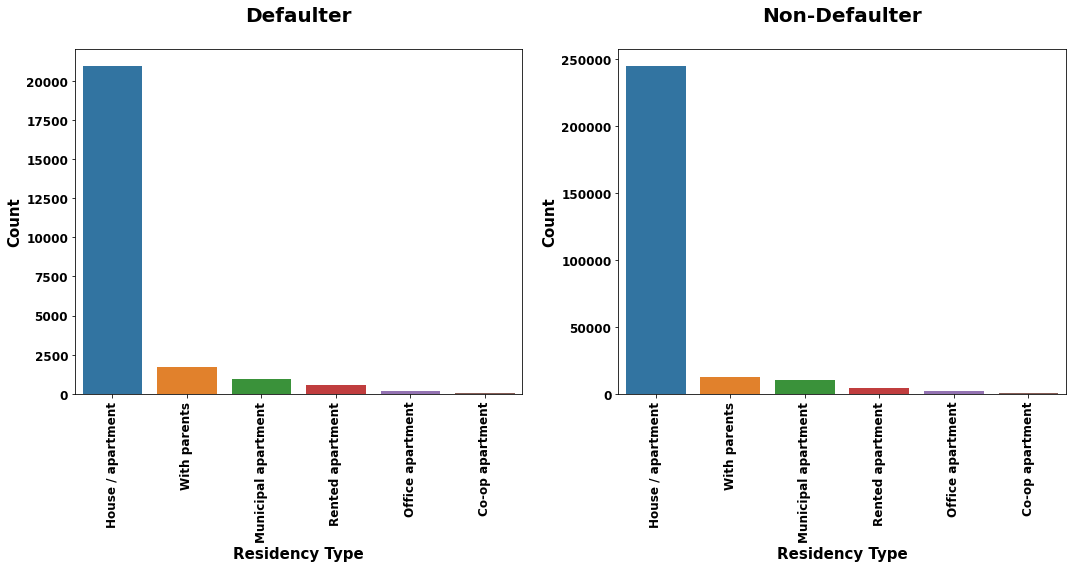

In [59]:
#Plot countplot for NAME_HOUSING_TYPE w.r.t. Target variable
fig = plt.figure(figsize=(15,8))

# Defaulters
plt.subplot(1,2,1)
order_def = defaulter_app_data['NAME_HOUSING_TYPE'].value_counts(ascending=False).index
sns.countplot(data=defaulter_app_data, x='NAME_HOUSING_TYPE', order=order_def)
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Residency Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Non-Defaulters
plt.subplot(1,2,2)
order_nondef = nondefaulter_app_data['NAME_HOUSING_TYPE'].value_counts(ascending=False).index
sns.countplot(data=nondefaulter_app_data, x='NAME_HOUSING_TYPE', order=order_nondef)
#Title
plt.title('Non-Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Residency Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

#### Observation:
- Most of the clients are **residing in house/appartment** and have **high data imbalance** compared with other types for Defaulters and Non-Defaulters.
- Few clients comes under the group **staying with parents** followed by **Municipal apartment, Rented apartment**. Very few clients residing in **office apartment and co-op apartment**.

## <font color='Chocolate'>3.8.5 Client Asset Details</font>

Here we are going to analyze how many applicants/clients own **Car** or **House** using Pie Plot.

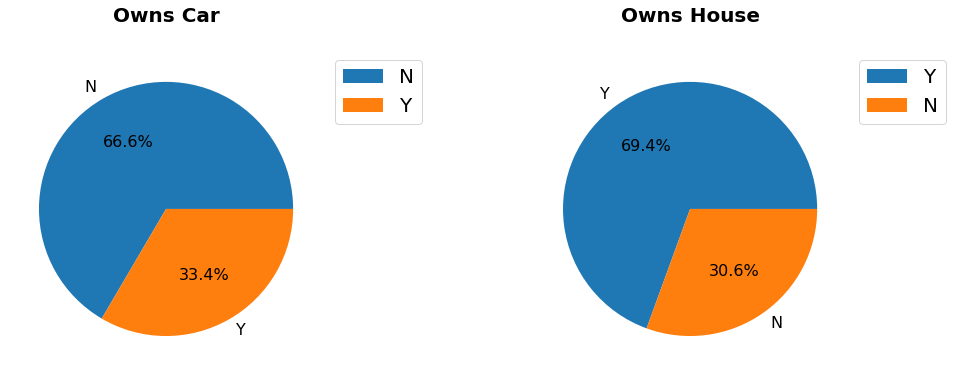

In [60]:
#Plot pie chart for FLAG_OWN_CAR and FLAG_OWN_REALTY variables w.r.t. Target variable
fig = plt.figure(figsize=(15,10))

own_car = application_data_refined['FLAG_OWN_CAR'].value_counts(normalize=True) * 100
car_flag = own_car.index
plt.subplot(2,2,1)
plt.pie(own_car, labels = car_flag,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Owns Car\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(car_flag,bbox_to_anchor=(1,1),fontsize=20)

own_house = application_data_refined['FLAG_OWN_REALTY'].value_counts(normalize=True) * 100
house_flag = own_house.index
plt.subplot(2,2,2)
plt.pie(own_house, labels = house_flag,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Owns House\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(house_flag,bbox_to_anchor=(1,1),fontsize=20)

fig.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

#### Observation:
- Most of the clients owns house (**69.5%**).
- Most of the clients doesn't own car (**66.6%**).

**Now let's check the number of defaulters and non-defaulters present who has own car or house.**

### Client Own Car - Defaulter vs Non-Defaulter

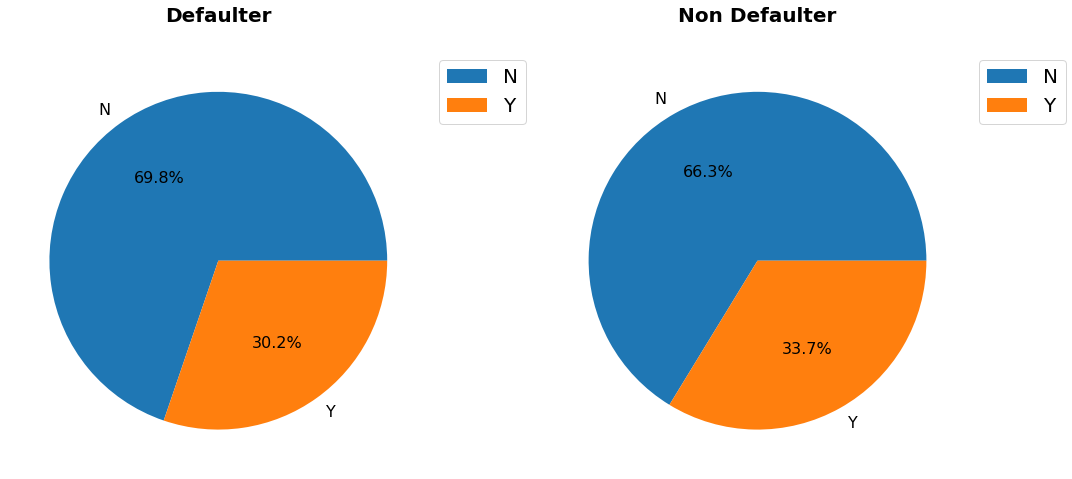

In [61]:
fig = plt.figure(figsize=(15,10))

own_car_def = defaulter_app_data['FLAG_OWN_CAR'].value_counts(normalize=True) * 100
car_flag_def = own_car_def.index
plt.subplot(1,2,1)
plt.pie(own_car_def, labels = car_flag_def,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(car_flag_def,bbox_to_anchor=(1,1),fontsize=20)

own_car_nondef = nondefaulter_app_data['FLAG_OWN_CAR'].value_counts(normalize=True) * 100
car_flag_nondef = own_car_nondef.index
plt.subplot(1,2,2)
plt.pie(own_car_nondef, labels = car_flag_nondef,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Non Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(car_flag_nondef,bbox_to_anchor=(1,1),fontsize=20)


fig.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

### Client Own House - Defaulter vs Non-Defaulter

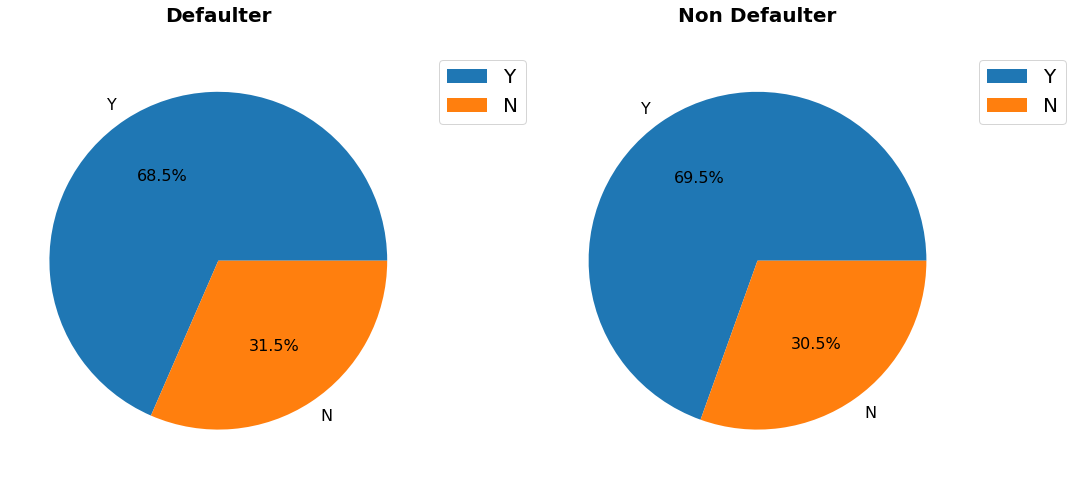

In [62]:
fig = plt.figure(figsize=(15,10))

own_house_def = defaulter_app_data['FLAG_OWN_REALTY'].value_counts(normalize=True) * 100
house_flag_def = own_house_def.index
plt.subplot(1,2,1)
plt.pie(own_house_def, labels = house_flag_def,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(house_flag_def,bbox_to_anchor=(1,1),fontsize=20)

own_house_nondef = nondefaulter_app_data['FLAG_OWN_REALTY'].value_counts(normalize=True) * 100
house_flag_nondef = own_house_nondef.index
plt.subplot(1,2,2)
plt.pie(own_house_nondef, labels = house_flag_nondef,autopct='%1.1f%%',textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
#Title
plt.title('Non Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.legend(house_flag_nondef,bbox_to_anchor=(1,1),fontsize=20)


fig.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

#### Observation:
From the above plots we can say that:
- We have around **69.8%** clients from the total number of defaulters who **doesn't own car**.
- We have around **31.5%** clients from the list of number of defaulter who **doesn't own house**.
- In both the assets, defaulters have less ratio than non-defaulters.

## <font color='Chocolate'>3.8.6 Client Age Group</font>

Let us analyze and check how many clients belongs to which age group the most.

Since we have age in days in our dataset, let us convert it to years and store it in a new variable called **'Age'**.

In [63]:
application_data_refined['Age'] = application_data_refined['DAYS_BIRTH']//365
defaulter_app_data['Age'] = defaulter_app_data['DAYS_BIRTH']//365
nondefaulter_app_data['Age'] = nondefaulter_app_data['DAYS_BIRTH']//365

Now compare the age groups between defaulters and non-defaulters using KDE plot.

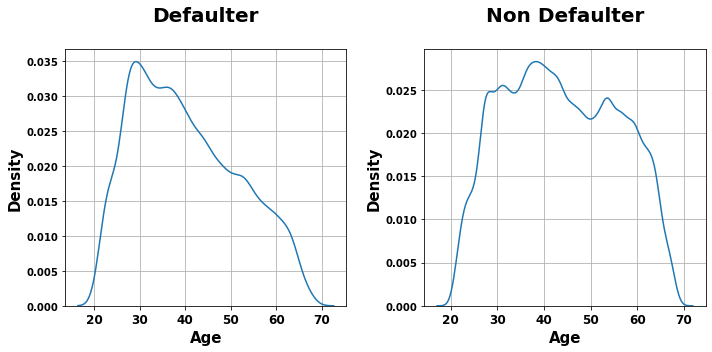

In [64]:
fig = plt.figure(figsize=(10,5))

# Defaulter
plt.subplot(1,2,1)
sns.kdeplot(defaulter_app_data['Age'])
plt.title('Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Age', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Density', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontweight=600)
plt.grid()

# Non-Defaulter
plt.subplot(1,2,2)
sns.kdeplot(nondefaulter_app_data['Age'])
plt.title('Non Defaulter\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Age', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Density', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontweight=600)

fig.tight_layout(h_pad = 2, w_pad = 2)
plt.grid()
plt.show()

#### Observation:
- In defaulter case, 
    - Most of the clients belong to age group between 25 and 40.
    - Number of clients gradually decreases when age increases.
    
- In Non-defaulter case,
    - Most of the clients belong to age group between 25 and 55.
    - Very few clients are present from the age 60.

## <font color='Chocolate'>3.9 Bivariate and Multivariate Analysis</font>

We are going to analyze multiple data variables with respect to Target variable and identify the patterns/trends of it.
- 3.9.1 Loan Credit Sanctioned for each Family Status w.r.t Target Variable
- 3.9.2 Loan Credit Sanctioned for each type of Clients Residency w.r.t. Target Variable
- 3.9.3 Check Defaulters Population in each Family Status and Residency Type
- 3.9.4 Check Defaulters Population in each Income and Education Types
- 3.9.5 Region Related Information
- 3.9.6 Client Social Circle
- 3.9.7 Average Income Salary for each Occupation Type w.r.t Target variable
- 3.9.8 Correlation - Loan Credit, Loan Annuity and Goods Price Loan

## <font color='Chocolate'>3.9.1 Loan Credit Sanctioned for each Family Status type w.r.t Target Variable</font>

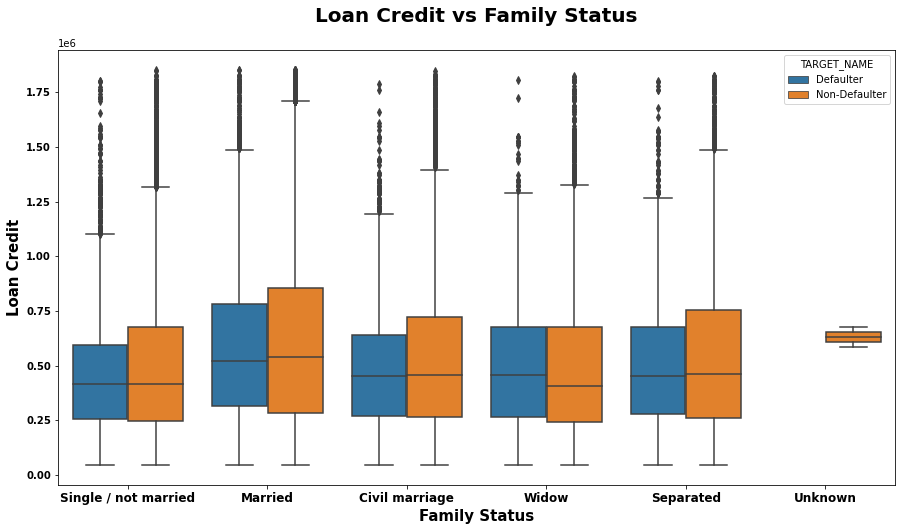

In [65]:
plt.figure(figsize=(15,8))

sns.boxplot(data=application_data_refined,x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue='TARGET_NAME')
plt.title('Loan Credit vs Family Status\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Family Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Loan Credit', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontweight=600)

plt.show()

#### Observation:
- **Highest and Average** loan amount credited for **Married** status for both defaulters and non-defaulters are having **higher** in number than other status types (excluding Unknown). 
- Average loan amount credited for the client who belongs to **Widow** status for defaulters is **greater** than non-defaulters. Bank has to consider this factor while providing loan to this type.

## <font color='Chocolate'>3.9.2 Loan Credit Sanctioned for each type of Clients Residency w.r.t. Target Variable</font>

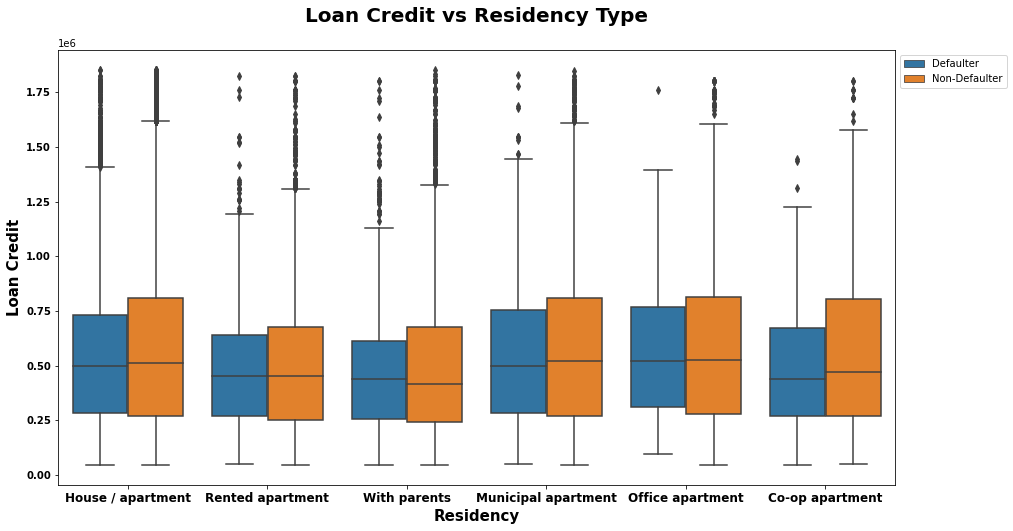

In [66]:
plt.figure(figsize=(15,8))

sns.boxplot(data=application_data_refined,x='NAME_HOUSING_TYPE',y='AMT_CREDIT',hue='TARGET_NAME')
plt.title('Loan Credit vs Residency Type\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Residency', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Loan Credit', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontweight=600)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

#### Observation:
- Average loan amount sanctioned is similar for **House/Apartment, Municipal apartment and Office apartment** types.
- For both defaulters and non-defaulters, highest loan credit provided for the client who resides in **House/apartment**.
- Defaulters who provided with high loan credit and lives in house/apartment are the **most** in population and continuous in nature who haven't cleared loan on time compared with other residency types. Bank has to consider this while providing loan to this type.

## <font color='Chocolate'>3.9.3 Check Defaulters Population in each Family Status and Residency Type</font>

In [67]:
family_housing_relation = pd.pivot_table(data=application_data_refined, index='NAME_HOUSING_TYPE',columns='NAME_FAMILY_STATUS',
                                        values='TARGET')
family_housing_relation.drop(labels='Unknown',axis=1,inplace=True)
family_housing_relation

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_HOUSING_TYPE,,,,,
Co-op apartment,0.066667,0.063253,0.138462,0.113971,0.037037
House / apartment,0.096696,0.074640,0.078836,0.095469,0.057431
Municipal apartment,0.105263,0.081662,0.088421,0.097997,0.065385
Office apartment,0.099099,0.062840,0.065089,0.067385,0.056604
Rented apartment,0.138386,0.117135,0.142433,0.131859,0.075269
With parents,0.136763,0.114144,0.117647,0.116006,0.111888


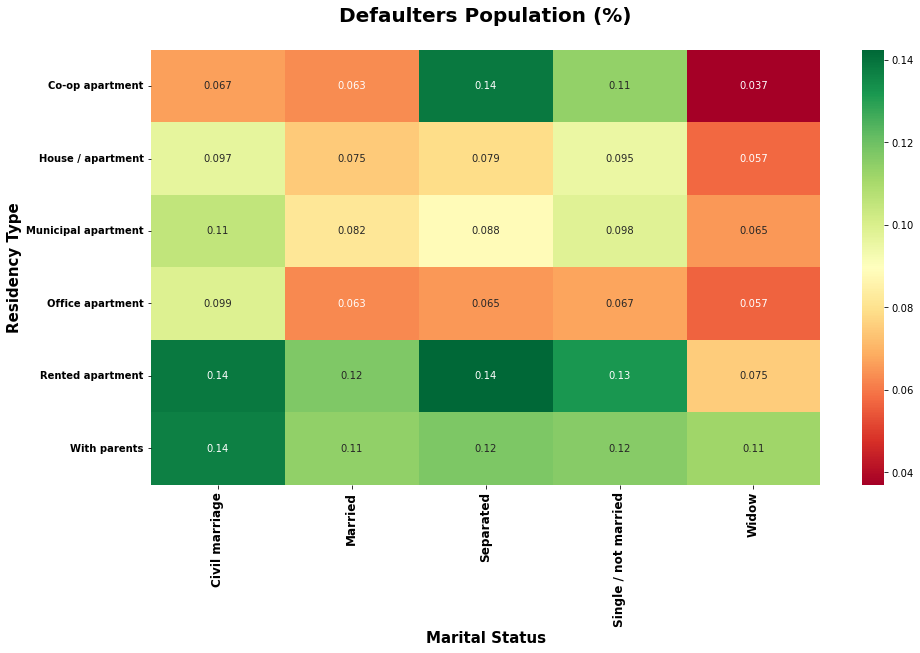

In [68]:
plt.figure(figsize=(15,8))

sns.heatmap(family_housing_relation,cmap='RdYlGn',annot=True)
plt.title('Defaulters Population (%)\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Marital Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Residency Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontweight=600)

plt.show()

#### Observation:
- From the above plot we can clearly say that a greater number of defaulters are staying either in **Rented apartment or with parents especially** whose marital status is **civil marriage, separated or single/not married**
- We also have decent number of defaulters with **Married or Widow status** who resides in **rented apartment or with parents**.
- We also have high number of defaulters under co-op apartment residency type with marital status as **separated or single/not married**.
- We have less amount of defaulters population for other residency types.

## <font color='Chocolate'>3.9.4 Check Defaulters Population in each Income and Education Types</font>

In [69]:
income_education_relation = pd.pivot_table(data=application_data_refined, index='NAME_INCOME_TYPE',columns='NAME_EDUCATION_TYPE',
                                        values='TARGET',aggfunc=sum)
income_education_relation.fillna(0,inplace=True)
income_education_relation

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,0.0,0.0,0.0,0.0,0.0
Commercial associate,1.0,1156.0,269.0,56.0,3717.0
Maternity leave,0.0,0.0,0.0,0.0,2.0
Pensioner,0.0,331.0,23.0,102.0,2503.0
State servant,0.0,331.0,52.0,8.0,836.0
Student,0.0,0.0,0.0,0.0,0.0
Unemployed,0.0,0.0,1.0,0.0,7.0
Working,2.0,2025.0,509.0,251.0,12288.0


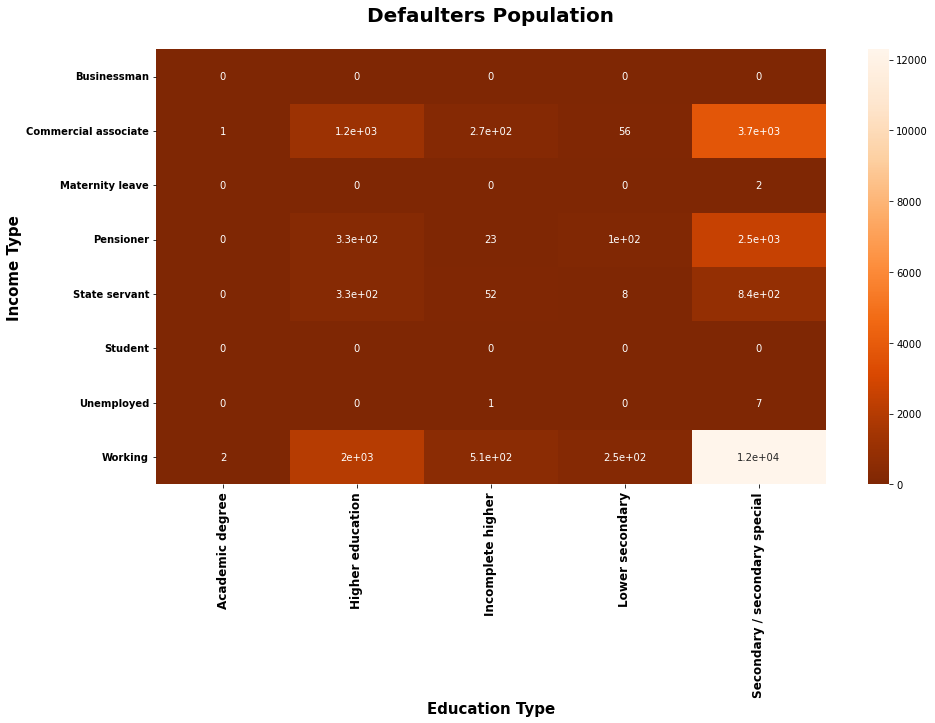

In [70]:
plt.figure(figsize=(15,8))

sns.heatmap(income_education_relation,cmap='Oranges_r',annot=True)
plt.title('Defaulters Population\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Education Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Income Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontweight=600)

plt.show()

#### Observation:
- From the above plot, we can say that a greater number of defaulters present under **commercial associate, pensioner, state servant and working** income types whose educational qualification is **secondary/secondary special (Total: 3713 + 2501 + 836 + 12276 = 19326 defaulters)**.
- The same applies for **Higher education** whose income types as **commercial associate, pensioner, state servant and working (Total: 1153 + 328 + 329 + 2018 = 3828 defaulters)**.
- Defaulter rate is very high in **Higher and Secondary/secondary special** education types compared with others.

## <font color='Chocolate'>3.9.5 Region Related Information</font>

Let's check the clients region related information and the ratings provided for the corresponding regions.
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- REG_CITY_NOT_WORK_CITY
- REGION_RATING_CLIENT
- REGION_RATING_CLIENT_W_CITY

In [71]:
region_variables = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

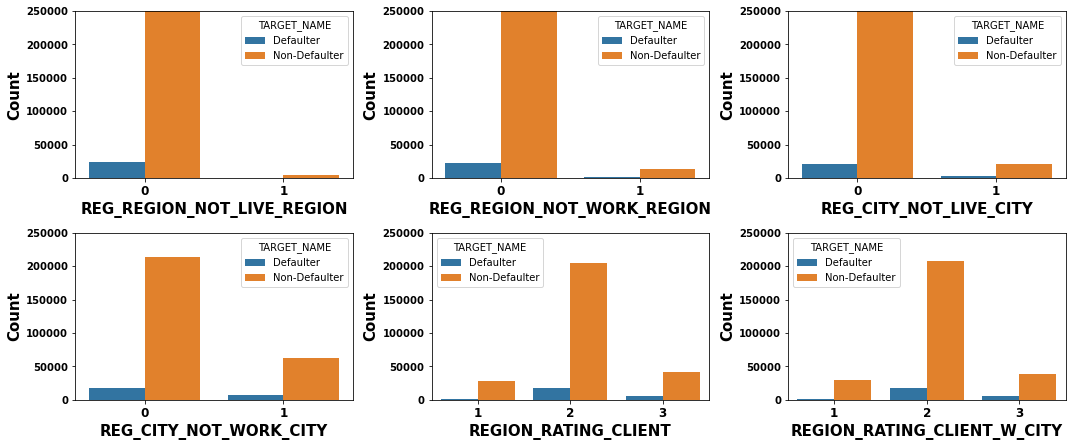

In [72]:
fig=plt.subplots(figsize=(15, 15))

for index, column in enumerate(region_variables):
    plt.subplot(5, 3, index+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_data_refined[column], hue=application_data_refined['TARGET_NAME'])
    plt.xlabel(column, fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.ylabel('Count', fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.xticks(fontsize=12,fontweight=600)
    plt.yticks(fontweight=600)
    plt.tight_layout()
    
plt.show()

#### Observation:
- Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0, REG_REGION_NOT_LIVE_REGION=0, REG_CITY_NOT_LIVE_CITY=0, REG_CITY_NOT_WORK_CITY=0 i.e. **permanent address and working address is same**.
- More number of Applicants/clients have **Region rating of 2** (both region and city levels).

## <font color='Chocolate'>3.9.6 Client Social Circle</font>

In [73]:
client_social_circle = application_data_refined[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].corr()
client_social_circle

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.329952,0.998494,0.254206
DEF_30_CNT_SOCIAL_CIRCLE,0.329952,1.000000,0.332186,0.860949
OBS_60_CNT_SOCIAL_CIRCLE,0.998494,0.332186,1.000000,0.256287
DEF_60_CNT_SOCIAL_CIRCLE,0.254206,0.860949,0.256287,1.000000


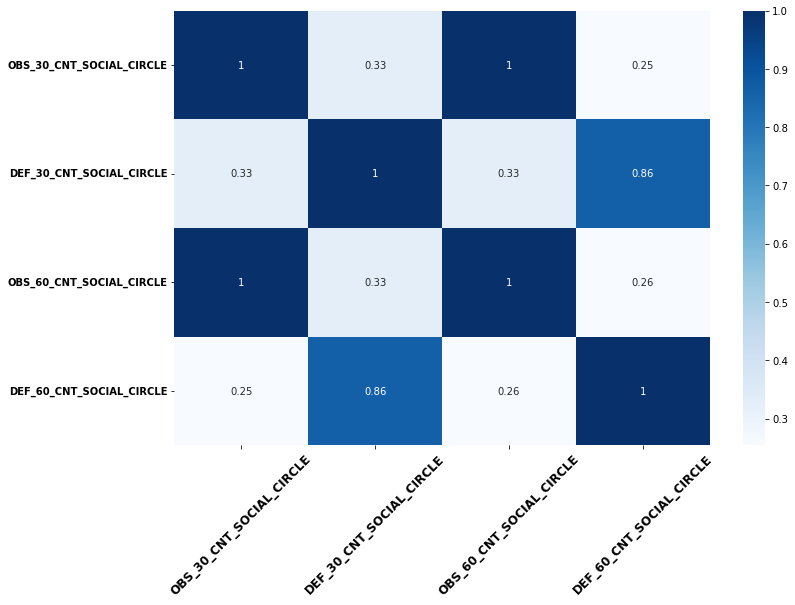

In [74]:
plt.figure(figsize=(12,8))

sns.heatmap(client_social_circle,cmap='Blues',annot=True)
plt.xticks(rotation=45,fontsize=12,fontweight=600)
plt.yticks(fontweight=600)
#plt.title('Client Social Circle\n',fontdict={'fontsize': 20, 'fontweight' : 700})

plt.show()

#### Observation:
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated i.e., if the number of observations of client's social surroundings defaulted on 30 DPD increases then the number of observations of client's social surroundings defaulted on 60 DPD also increases.
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns and we can have any one of the feature in consideration and other can be ignored.

## <font color='Chocolate'>3.9.7 Average Income Salary for each Occupation Type w.r.t Target variable</font>

In [75]:
avg_income_occupation_def = defaulter_app_data[['TARGET_NAME','OCCUPATION_TYPE','AMT_INCOME_TOTAL']].groupby(by=['TARGET_NAME','OCCUPATION_TYPE']).mean()
avg_income_occupation_def.reset_index(inplace=True)

In [76]:
avg_income_occupation_nondef = nondefaulter_app_data[['TARGET_NAME','OCCUPATION_TYPE','AMT_INCOME_TOTAL']].groupby(by=['TARGET_NAME','OCCUPATION_TYPE']).mean()
avg_income_occupation_nondef.reset_index(inplace=True)

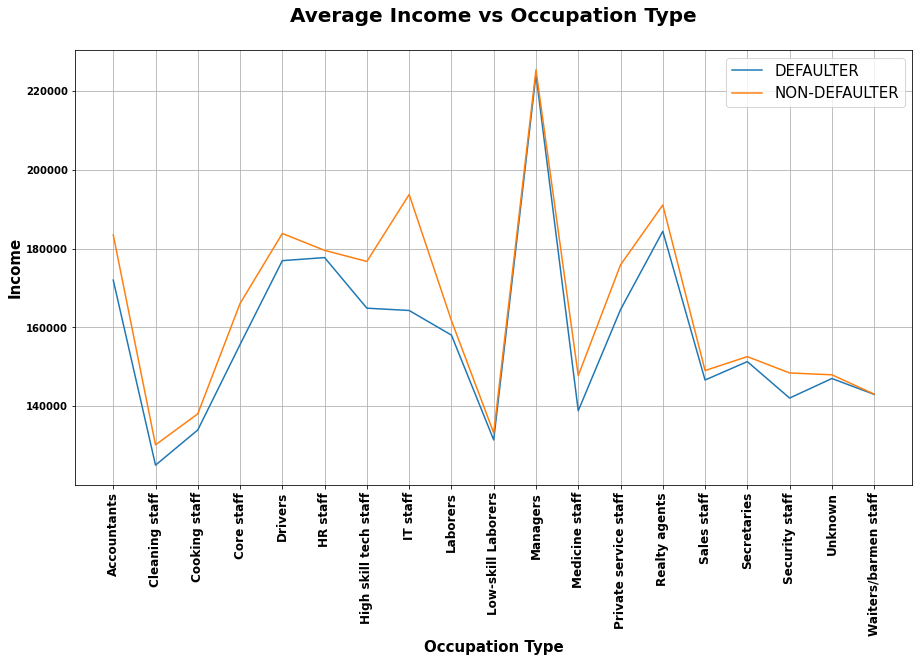

In [77]:
fig,ax = plt.subplots()

defaulter, = ax.plot('OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',data=avg_income_occupation_def)
defaulter.set_label('DEFAULTER')
non_defaulter, = plt.plot('OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',data=avg_income_occupation_nondef)
non_defaulter.set_label('NON-DEFAULTER')
plt.title('Average Income vs Occupation Type\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Occupation Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Income', fontdict={'fontsize': 15, 'fontweight' : 600})


plt.yticks(fontweight=600)
plt.xticks(rotation=90,fontsize=12,fontweight=600)

plt.legend(fontsize=15)
plt.grid()
fig.set_size_inches(15,8)
plt.show()

#### Observation:
- We can see that **Managers** have highest average income salary compared with other occupation types for both Defaulters and Non-Defaulters.
- Next best highest average income salary present for **IT staff** followed by **Realty agents, Accountants and Drivers**.
- Defaulters having less average income for all the occupation types compared with Non-Defaulters.

## <font color='Chocolate'>3.9.8 Correlation - Loan Credit, Loan Annuity and Goods Price Loan</font>

In [78]:
amt_variables = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Figure size 1080x720 with 0 Axes>

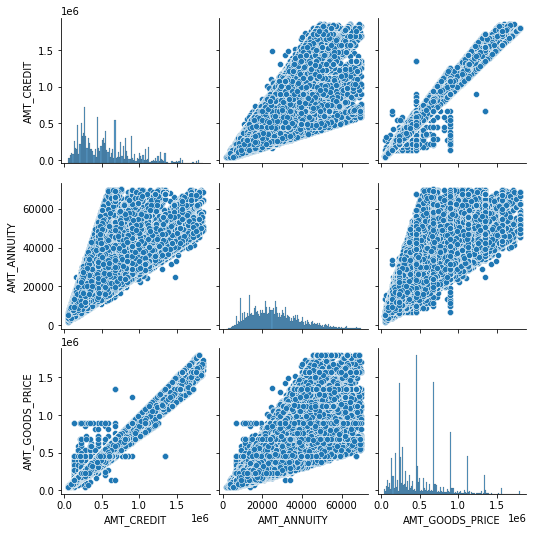

In [79]:
plt.figure(figsize=(15,10))

sns.pairplot(application_data_refined[amt_variables])

plt.show()

#### Observation:
- There is a high linear correlation between loan credit and goods price for which loan given i.e., if the price of the goods increases then the loan amount provided to the client will also be increased.
- There is also a good linear correlation for loan annuity with loan credit and goods price loan variables i.e., if the price of goods increases then loan amount sanction also increases and obviously the loan annuity amount will also get increased for the regular time intervals.

## <font color='Chocolate'>3.10 Top 10 Correlation for Client with Payment Difficulties and Other Cases</font>

In [80]:
defaulter_corr = defaulter_app_data.corr()
round(defaulter_corr,2)
defaulter_list = defaulter_corr.unstack()

# List top 10 correlation for defaulters (client with payment difficulties)
defaulter_list.sort_values(ascending=False).drop_duplicates().head(12)

SK_ID_CURR                  SK_ID_CURR                     1.000000
DAYS_BIRTH                  Age                            0.999692
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998264
AMT_CREDIT                  AMT_GOODS_PRICE                0.980943
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.957134
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.885144
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.868692
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847758
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.777761
AMT_CREDIT                  AMT_ANNUITY                    0.749648
AMT_GOODS_PRICE             AMT_ANNUITY                    0.746699
FLAG_DOCUMENT_6             DAYS_EMPLOYED                  0.618880
dtype: float64

**We can ignore DAYS_BIRTH and Age variables from the defaulters correlation list as Age variable is derived from DAYS_BIRTH variable.**

In [81]:
nondefaulter_corr = nondefaulter_app_data.corr()
round(nondefaulter_corr,2)
nondefaulter_list = nondefaulter_corr.unstack()

# List top 10 correlation for defaulters (client with payment difficulties)
nondefaulter_list.sort_values(ascending=False).drop_duplicates().head(12)

SK_ID_CURR                  SK_ID_CURR                     1.000000
Age                         DAYS_BIRTH                     0.999713
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998514
AMT_CREDIT                  AMT_GOODS_PRICE                0.984987
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949930
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.878013
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.862856
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859852
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830205
AMT_ANNUITY                 AMT_CREDIT                     0.776760
                            AMT_GOODS_PRICE                0.776730
DAYS_BIRTH                  DAYS_EMPLOYED                  0.629680
dtype: float64

**We can ignore DAYS_BIRTH and Age variables from the non-defaulters correlation list as Age variable is derived from DAYS_BIRTH variable.**

### <font color='DarkBlue'>Top 10 Correlation for Defaulters (Client with Payment Difficulties)</font>
1. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
2. (AMT_CREDIT, AMT_GOODS_PRICE)
3. (REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT)
4. (CNT_FAM_MEMBERS, CNT_CHILDREN)
5. (DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE)
6. (LIVE_REGION_NOT_WORK_REGION, REG_REGION_NOT_WORK_REGION)
7. (REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY)
8. (AMT_CREDIT, AMT_ANNUITY)
9. (AMT_ANNUITY, AMT_GOODS_PRICE)
10. (FLAG_DOCUMENT_6, DAYS_EMPLOYED)

### <font color='DarkBlue'>Top 10 Correlation for Non-Defaulters (Client without any Payment Difficulties)</font>
1. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
2. (AMT_GOODS_PRICE, AMT_CREDIT)
3. (REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT)
4. (CNT_CHILDREN, CNT_FAM_MEMBERS)
5. (REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION)
6. (DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE)
7. (LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY)
8. (AMT_GOODS_PRICE, AMT_ANNUITY)
9. (AMT_ANNUITY, AMT_CREDIT)
10. (DAYS_EMPLOYED, DAYS_BIRTH)

## <font color='Chocolate'>3.11 Summary:</font>
1. Current application dataset is highly imbalanced in terms of **Target** i.e., around 91.82% are Non-Defaulters and rest 8.18% are Defaulters.
2. **Type of Loan:** We have observed that most of the clients (both defaulters and non-defaulters) keen on cash loan rather than revolving loan.
3. **Client background:** Most number of clients/applicants are from working professionals with Business Entity Type 3 organization class and occupation as Laborers. Also majority of the clients are married and residing in House/Apartment
4. **Client Asset Information:** In terms of owning car and house, defaulters have less ratio than non-defaulters.
5. Highest and Average loan credit sanctioned for the defaulters are having higher in number for those who married. Also average loan amount credited for the client who belongs to Widow status for defaulters is greater than non-defaulters.
6. **Client Age Group:** Majority of the clients (defaulters + non-defaulters) belongs to the age group between 25 and 50.
7. For defaulters, highest loan credit provided for the client who resides in House/apartment and they are the most in population who haven't cleared loan on time compared with other residency types. 
8. **Defaulters Population rate:**
    1. We have observed that a greater number of defaulters are staying either in Rented apartment or with parents especially whose marital status is civil marriage, separated or single/not married. We also have high number of defaulters under co-op apartment residency type with marital status as separated or single/not married.
    2. We have also observed that a greater number of defaulters present under commercial associate, pensioner, state servant and working income types whose educational qualification is secondary/secondary special. Defaulter rate is also very high in Higher and Secondary/secondary special education types compared with others.
9. **Client Region related Information:** Most of the defaulters have same permanent and working address. Also most of the defaulters have region rating of 2 (both region and city level).
10. **Client Average Income Salary:** We can see that **Managers** have highest average income salary compared with other occupation types for both Defaulters and Non-Defaulters. Defaulters having less average income for all the occupation types compared with Non-Defaulters.
11. **Correlation of Loan Amount:** We have noticed that there is a high correlation between Loan Credit, Loan Annuity and Amount Goods Price Loan variables. If the rate of one variables then rest other variables also increases.
12. We have also seen top 10 correlation for defaulters and non-defaulters data. Amongst them the top 3 correlations are **(OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE), (AMT_CREDIT, AMT_GOODS_PRICE), (REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT)**.

# <font color='Chocolate'>4. Previous Loan Application Data Analysis</font>

## <font color='Chocolate'>4.1 Reading the dataset - Previous Application data</font>

In [82]:
previous_application = pd.read_csv('previous_application.csv')

In [83]:
# Inspect previous application dataset
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## <font color='Chocolate'>4.2 Inspect Previous Application Dataset information and its data types</font>

In [84]:
# Previous Application dataset
previous_application.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
# Check dataframes shape
print(previous_application.shape)

(1670214, 37)


From the Previous Application dataset, we have total of **1670214 rows and 37 columns** out of which we have:
- **15 columns with Float datatype**
- **6 columns with Int datatype**
- **16 columns with Object datatype**

## <font color='Chocolate'>4.3 Handling Missing Data</font>

In [86]:
# Check columns having missing data or NULL values in previous application dataset
missing_previous_app = columns_missing_data(previous_application)
print(f"Columns having missing/NULL data in Previous Application dataset:\n\n{missing_previous_app}")

Columns having missing/NULL data in Previous Application dataset:

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64


#### Observation:
1. From the above inspection on missing data, we can see that five columns/features that are having missing values with more than 45% of dataset. Hence we can drop these columns.
    - **Columns that can be dropped:** RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY, AMT_DOWN_PAYMENT, RATE_DOWN_PAYMENT, NAME_TYPE_SUITE.
2. We have another two columns (PRODUCT_COMBINATION, AMT_CREDIT) which are having very less number of missing data. It is better to drop the records having NULL/missing values for these columns.
3. Also we have some other columns with missing percentage between 22 and 41 (NFLAG_INSURED_ON_APPROVAL, DAYS_TERMINATION, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DUE, DAYS_FIRST_DRAWING, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_PAYMENT) which falls under MAR (Missing At Random) category i.e., the reason behind the missing values for these columns/features may be associated with some other features. We will impute **median** value for AMT_GOODS_PRICE, AMT_ANNUITY and CNT_PAYMENT. It is better to keep rest other columns as is and no need to impute the new values.

## <font color='Chocolate'>4.3.1 Drop rejected columns (Dataset with more than 45% missing values)</font>

In [87]:
rejected_columns_prev = missing_previous_app[missing_previous_app>=45].index.to_list()
print(rejected_columns_prev, f'Total Rejected columns: {len(rejected_columns_prev)}',sep='\n\n')

['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE']

Total Rejected columns: 5


In [88]:
# Drop rejected columns in previous application dataset
previous_application_refined = previous_application.drop(labels = rejected_columns_prev, axis=1)

In [89]:
# Checking the shape after dropping rejected columns
previous_application_refined.shape

(1670214, 32)

In [90]:
# Check new Previous Application dataset info
previous_application_refined.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

## <font color='Chocolate'>4.3.2 Drop the records which has missing data in Product Combination and Loan Credit Features (<0.1%)</font>

In [91]:
previous_application_refined = previous_application_refined[~previous_application_refined['AMT_CREDIT'].isna()]
previous_application_refined = previous_application_refined[~previous_application_refined['PRODUCT_COMBINATION'].isna()]

In [92]:
# Inspect the new data in previous application
previous_application_refined.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Check the shape of new previous application dataset
print(previous_application_refined.shape)

(1669867, 32)


#### Result:
We have treated the missing values for the previous application dataset by dropping the columns or records based on our observation.

## <font color='Chocolate'>4.3.3 Impute Missing Values</font>

We are going to impute **Median** values for AMT_GOODS_PRICE, AMT_ANNUITY and CNT_PAYMENT variables.

In [94]:
amt_goods_price_median = previous_application_refined['AMT_GOODS_PRICE'].median()
amt_annuity_median = previous_application_refined['AMT_ANNUITY'].median()
cnt_payment_median = previous_application_refined['CNT_PAYMENT'].median()

In [95]:
previous_application_refined['AMT_GOODS_PRICE'].fillna(amt_goods_price_median, inplace=True)
previous_application_refined['AMT_ANNUITY'].fillna(amt_goods_price_median, inplace=True)
previous_application_refined['CNT_PAYMENT'].fillna(amt_goods_price_median, inplace=True)

In [96]:
print(previous_application_refined['AMT_GOODS_PRICE'].isnull().sum())
print(previous_application_refined['AMT_ANNUITY'].isnull().sum())
print(previous_application_refined['CNT_PAYMENT'].isnull().sum())

0
0
0


#### Result:
We have treated the missing data for the important columns either by dropping or imputing the values with suitable methods in the previous application dataset.

## <font color='Chocolate'>4.4 Handling Outliers</font>

Check 'n' number of unique values for each variable and identify the potential variables that might have outliers.

In [97]:
# Check the number of unique values for each variable
previous_application_refined.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CONTRACT_TYPE                   3
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_STATUS                 4
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         50
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE                     2873
DAYS_FIRST_DUE                    2892
DAYS_DECISION                     2922
DAYS_LAST_DUE_1ST_VERSION

#### Observation:

We have large number of unique values for **AMT_CREDIT, AMT_APPLICATION AND AMT_GOODS_PRICE** variables which are continuous in nature. Now we need to check whether the outliers persists in these variables.

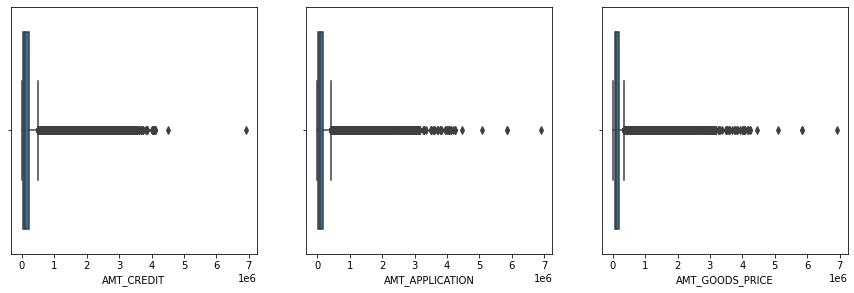

In [98]:
labels = ['AMT_CREDIT', 'AMT_APPLICATION','AMT_GOODS_PRICE']
boxplot_outlier(previous_application_refined, labels)

#### Observation:
From the above plots, we can see the outliers for the following variables:
1. **AMT_CREDIT**
2. **AMT_APPLICATION**
3. **AMT_GOODS_PRICE**

Let's observe each quantile value for each of the above variables and handle it accordingly.

In [99]:
amt_credit_quantile = np.quantile(previous_application_refined['AMT_CREDIT'],[0.75, 0.99, 1])
amt_application_quantile = np.quantile(previous_application_refined['AMT_APPLICATION'],[0.75, 0.99, 1])
amt_goods_price_quantile = np.quantile(previous_application_refined['AMT_GOODS_PRICE'],[0.75, 0.99, 1])
print(amt_credit_quantile, amt_application_quantile, amt_goods_price_quantile, sep='\n')

[ 216418.5 1515415.5 6905160. ]
[ 180441. 1350000. 6905160.]
[ 180495. 1350000. 6905160.]


We can clearly state that there is a huge difference between 99th percentile and max value for <font color='Red'>**AMT_CREDIT, AMT_APPLICATION, AMT_GOODS_PRICE**</font> variables. We can safely drop the records which falls outside of 99th percentile for these variables.

In [100]:
amt_credit_quantile_99 = np.quantile(previous_application_refined['AMT_CREDIT'],0.99)
amt_application_quantile_99 = np.quantile(previous_application_refined['AMT_APPLICATION'],0.99)
amt_goods_price_quantile_99 = np.quantile(previous_application_refined['AMT_GOODS_PRICE'],0.99)
print(amt_credit_quantile_99, amt_application_quantile_99, amt_goods_price_quantile_99, sep='\n')

1515415.5
1350000.0
1350000.0


In [101]:
previous_application_refined = previous_application_refined[previous_application_refined['AMT_CREDIT'] <= amt_credit_quantile_99]
previous_application_refined = previous_application_refined[previous_application_refined['AMT_APPLICATION'] <= amt_application_quantile_99]
previous_application_refined = previous_application_refined[previous_application_refined['AMT_GOODS_PRICE'] <= amt_goods_price_quantile_99]

In [102]:
previous_application_refined.shape

(1650746, 32)

**Records count drops from 1669867 to 1650746.**

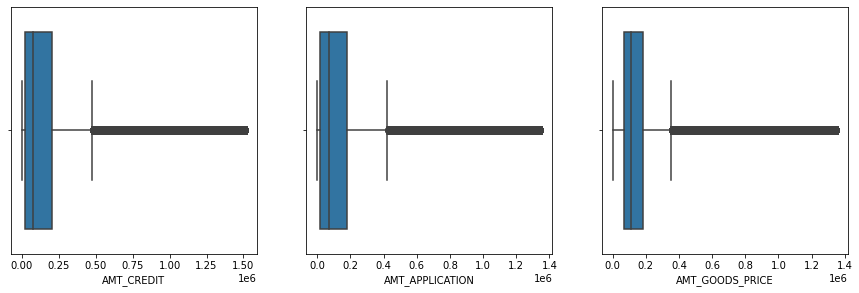

In [103]:
# Check the outliers for the continuous variables post records deletion
boxplot_outlier(previous_application_refined, labels)

#### Result:
Although the above plots still contains outliers even after we deleted some records, it is still continuous in nature. Hence these can be treated as normal values.

## <font color='Chocolate'>4.5 Fix Invalid Data</font>

The following days variables have negative values which are invalid:
- DAYS_DECISION
- DAYS_FIRST_DRAWING
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE
- DAYS_TERMINATION

In [104]:
days_variables = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
previous_application_refined[days_variables] = abs(previous_application_refined[days_variables])

In [105]:
previous_application_refined[days_variables].head()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,73,365243.0,42.0,300.0,42.0,37.0
1,164,365243.0,134.0,916.0,365243.0,365243.0
2,301,365243.0,271.0,59.0,365243.0,365243.0
3,512,365243.0,482.0,152.0,182.0,177.0
4,781,NaN,NaN,NaN,NaN,NaN


#### Result:
We have now successfully converted the above mentioned variables to positive values and looks valid.

## <font color='Chocolate'>4.6 Univariate Analysis</font>

We are going to analyze single data variable from the previous application dataset and identify the patterns/trends of it.
- 4.6.1 Loan Contract Type in Previous Application
- 4.6.2 Client Previous Application Type and Mode of Payment Preferred
- 4.6.3 Product Combination Type For Which Loan Applied
- 4.6.4 Loan Applicant Status and Reason For Rejection

## <font color='Chocolate'>4.6.1 Loan Contract Type In Previous Application</font>

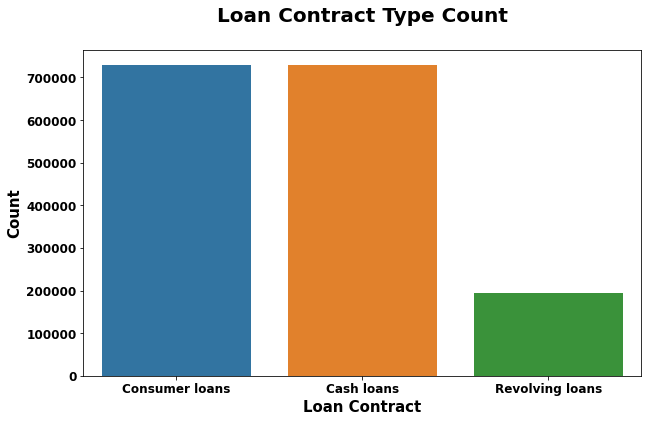

In [106]:
plt.figure(figsize=(10,6))

sns.countplot(data=previous_application_refined, x='NAME_CONTRACT_TYPE')
#Title
plt.title('Loan Contract Type Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Loan Contract', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

#### Observation:
- We can say that majority of the clients applied either **Consumer loans or Cash loans type**. Applicants counts for both of these clients are almost similar.
- We have a smaller number of applicants/clients who applied for **Revolving loans**.

## <font color='Chocolate'>4.6.2 Client Previous Application Type and Mode of Payment Preferred</font>

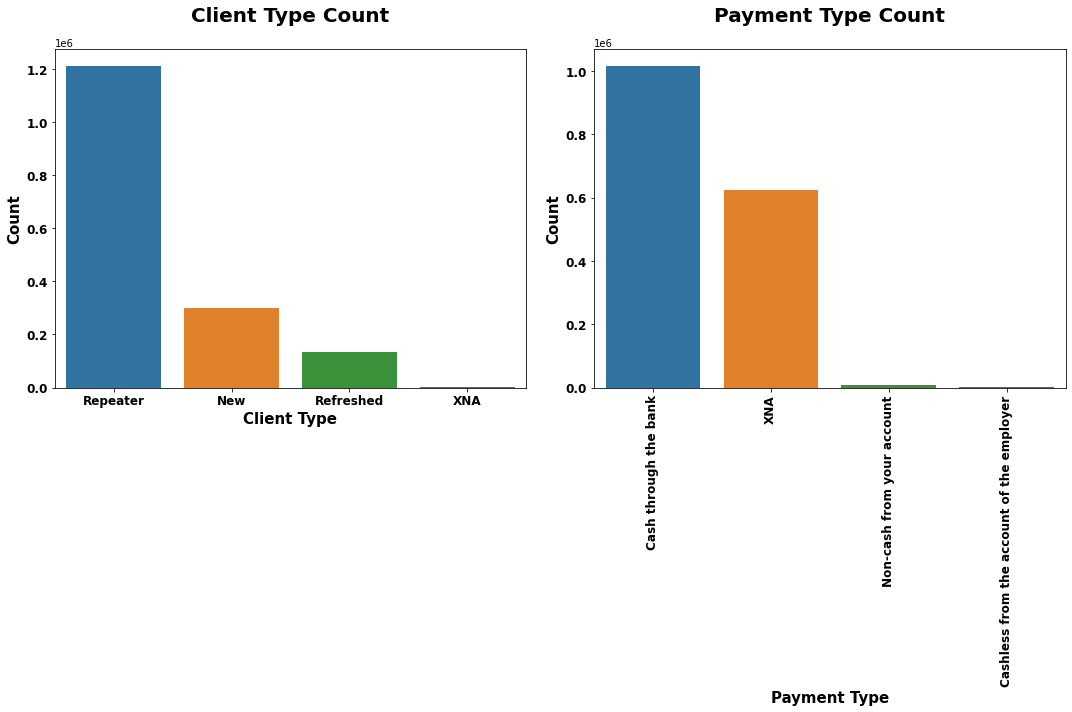

In [107]:
fig = plt.figure(figsize=(15,10))

# Client Type
plt.subplot(1,2,1)
sns.countplot(data=previous_application_refined, x='NAME_CLIENT_TYPE')
#Title
plt.title('Client Type Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Client Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

# Payment Type
plt.subplot(1,2,2)
sns.countplot(data=previous_application_refined, x='NAME_PAYMENT_TYPE')
#Title
plt.title('Payment Type Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Payment Type', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90, fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

#### Observation:
- Most of the clients are **repeater**.
- **'Cash through the bank'** is the most frequently used payment method.

## <font color='Chocolate'>4.6.3 Product Combination Type For Which Loan Applied</font>

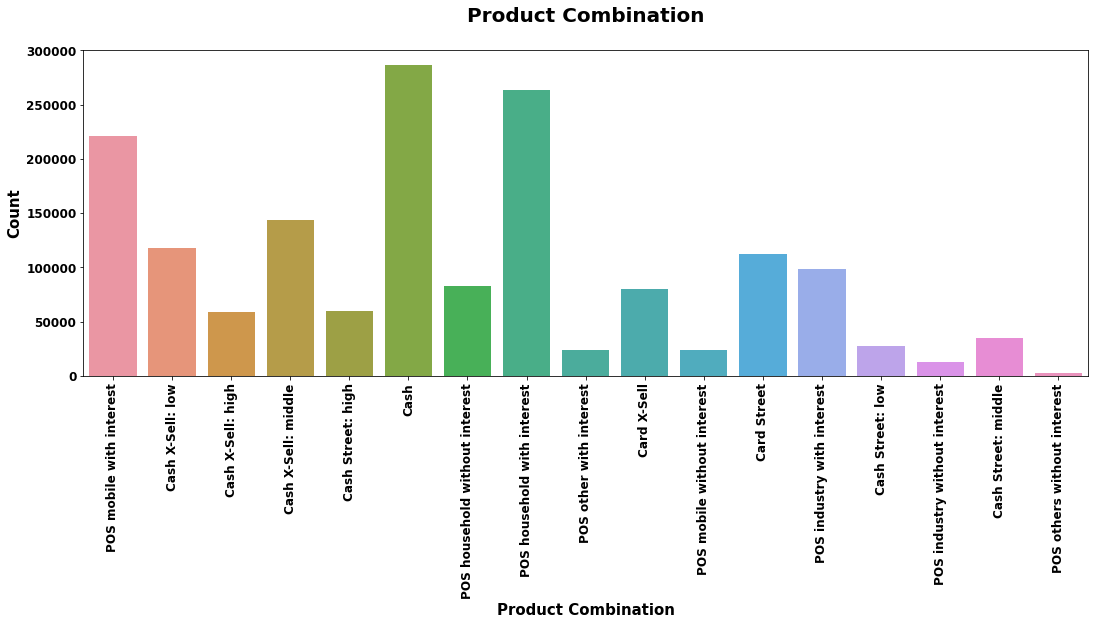

In [108]:
plt.figure(figsize=(18,6))

sns.countplot(data=previous_application_refined, x='PRODUCT_COMBINATION')
#Title
plt.title('Product Combination\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Product Combination', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

#### Observation:
- Highest number of clients applied for **cash** loan followed by **POS household with interest and POS mobile with interest** products.

## <font color='Chocolate'>4.6.4 Loan Application Status and Reason For Rejection</font>

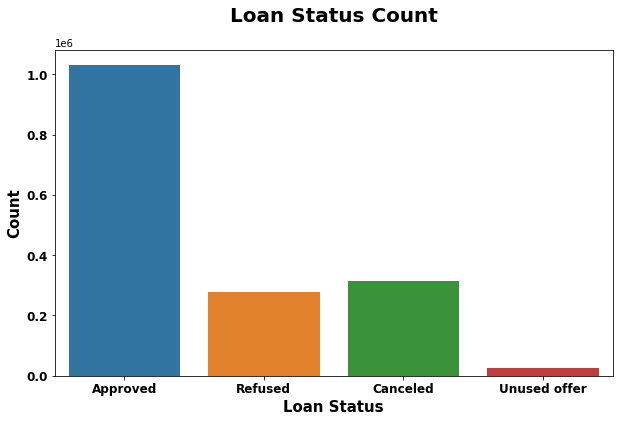

In [109]:
plt.figure(figsize=(10,6))

sns.countplot(data=previous_application_refined, x='NAME_CONTRACT_STATUS')
#Title
plt.title('Loan Status Count\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Loan Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

#### Observation:
- Majority of the previous loan applications got **approved**.
- Some of the other applications are in **cancelled or refused** status.
- Very less applications are in **Unused offer** status.

Now let's check the loan rejection reason for **Refused** loan status.

In [110]:
refused_loan_df = previous_application_refined[previous_application_refined['NAME_CONTRACT_STATUS'] == 'Refused']

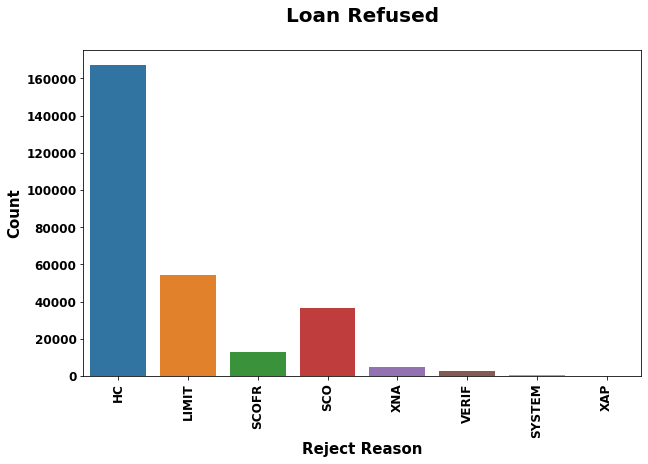

In [111]:
fig = plt.figure(figsize=(10,6))

# Refused status
sns.countplot(data=refused_loan_df, x='CODE_REJECT_REASON')
#Title
plt.title('Loan Refused\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Reject Reason', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

#### Observation:
- **'HC', 'LIMIT' and 'SCO'** (descending order) are the most common reasons for loan refused/rejected.

## <font color='Chocolate'>4.7 Bivariate and Multivariate Analysis</font>

We are going to analyze multiple data variables with respect to Target variable and identify the patterns/trends of it.
- 4.7.1 Loan Contract Status For Each Cash Loan Type
- 4.7.2 Check Defaulters From Previous Application - Occupation vs Loan Status

### <font color='DarkBlue'>Combine Current and Previous Application datasets</font>
**Let us merge both current application and previous application datasets into one dataset to derive more insights based on target variable.**

In [112]:
prev_curr_app = pd.merge(application_data_refined, previous_application_refined, how='inner', on='SK_ID_CURR')

In [113]:
prev_curr_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_NAME,Age,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Defaulter,25,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Defaulter,45,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Defaulter,45,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## <font color='Chocolate'>4.7.1 Loan Contract Status For Each Cash Loan Type</font>

Ignore the records which are having **Unknown** code (XAP, XNA) under cash loan purpose variable.

In [114]:
cash_loan_df = previous_application_refined[(previous_application_refined['NAME_CASH_LOAN_PURPOSE'] != 'XAP')]
cash_loan_df = cash_loan_df[(cash_loan_df['NAME_CASH_LOAN_PURPOSE'] != 'XNA')]

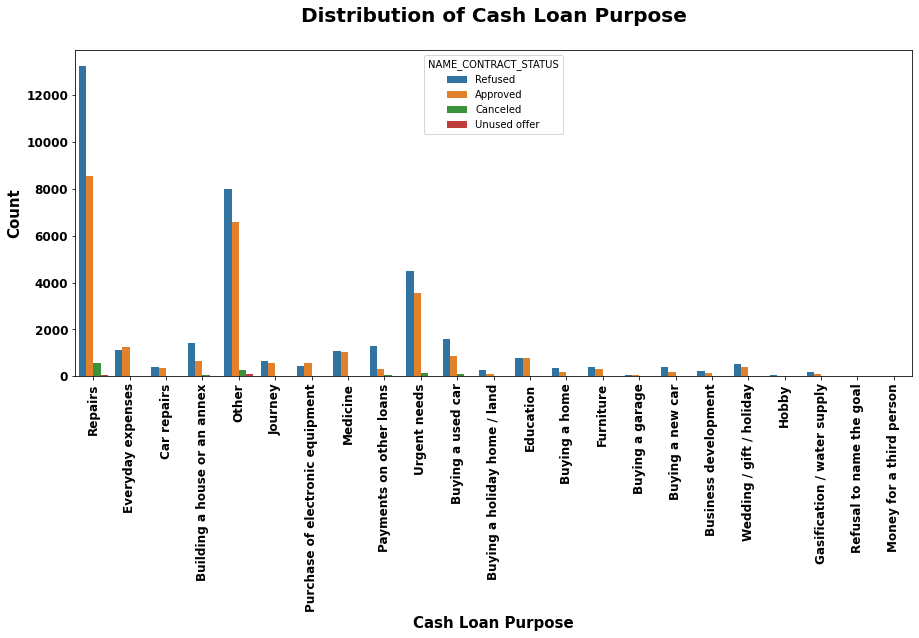

In [115]:
plt.figure(figsize=(15,6))

sns.countplot(data=cash_loan_df, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
#Title
plt.title('Distribution of Cash Loan Purpose\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Cash Loan Purpose', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.show()

#### Observation:
- Maximum number of the loans are rejected which have loan purpose as **Repairs**.
- **Payments of other loans** has much higher rejection than approval.
- **Education loan** has almost equal rates of approvals and rejections.

## <font color='Chocolate'>4.7.2 Check Defaulters From Previous Application - Occupation vs Loan Status</font>

In [116]:
occupation_loan_state_def = pd.pivot_table(data=prev_curr_app, index = 'OCCUPATION_TYPE',columns='NAME_CONTRACT_STATUS',
                                          values='TARGET')

occupation_loan_state_def = round(occupation_loan_state_def,2)

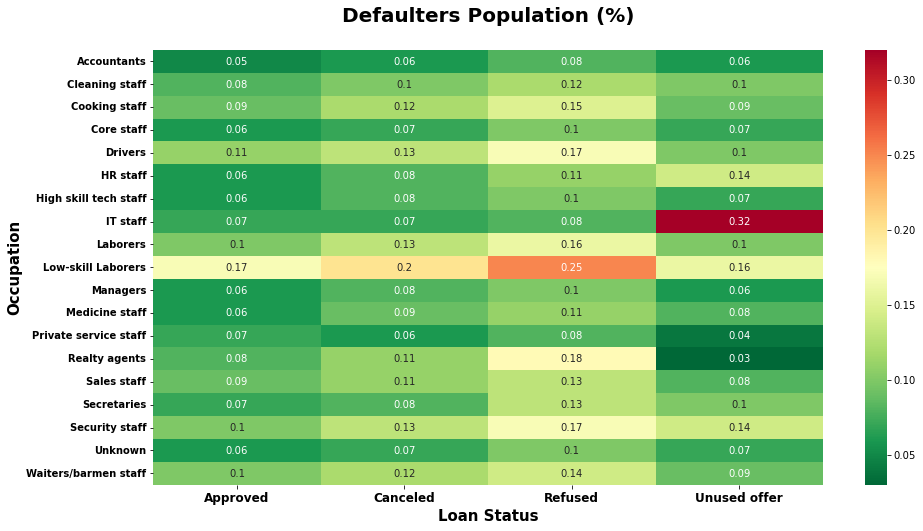

In [117]:
plt.figure(figsize=(15,8))

sns.heatmap(occupation_loan_state_def,cmap='RdYlGn_r',annot=True)
plt.title('Defaulters Population (%)\n',fontdict={'fontsize': 20, 'fontweight' : 700})
plt.xlabel('Loan Status', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel('Occupation', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(fontsize=12,fontweight=600)
plt.yticks(fontweight=600)

plt.show()

#### Observation:
- More number of defaulters loan applications got **rejected** whose occupation is **Low skilled Laborers**.
- Less number of defaulters loan applications got **rejected** whose occupations are **Private service staff, IT staff, Accountant and Manager**.

## <font color='Chocolate'>4.8 Summary</font>
1. **Loan Contract Type:** Majority of the clients applied either Consumer loans or Cash loans type and very less number of applicants/clients who applied for Revolving loans.
2. **Client Type and Payment mode:** Most of the clients are repeaters i.e., old customers with more than one previous applications and also prefers cash payment the most.
3. **Product preferred for Loan:** Highest number of clients applied for cash loan followed by POS household with interest and POS mobile with interest products.
4. **Loan Application Status:** Majority of the previous loan applications got approved. Some of the other applications are in cancelled or refused status and very less applications are in Unused offer status.
5. **Application Rejection reason:** 'HC', 'LIMIT' and 'SCO' (descending order) are the most common reasons for loan refused/rejected.
6. **Cash Loan Purposes and its states:** Maximum number of the loans are rejected which have loan purpose as Repairs. Payments of other loans has much higher rejection than approval. Education loan has almost equal rates of approvals and rejections.
7. **Defaulters from Previous Applications - Occupation vs Loan Status:**
 1. More number of defaulters loan applications got rejected whose occupation is Low skilled Laborers. 
 2. Less number of defaulters loan applications got rejected whose occupations are Private service staff, IT staff, Accountant and Manager.

# <font color='Chocolate'>5. Conclusion</font>
Bank/Finance Company must consider the following factors before providing loan to the clients:
1. From the experience/previous data, a client whose occupation is of Manager, IT staff, Accountant and Private Service Staff are less defaulters and able to clear the loans without any issue.
2. High loan repayment success rate from the clients whose age is between 25 and 50. This makes sense as most of them are working professionals with good income salary.
3. Provide loan to the client who own assets like own car or house will be a good consideration and high chance of loan repayment from them.
4. Though 'Repair' Purpose have higher chance of loan repayment, but they also have highest chance of being a defaulter. So, need to be more cautious in paying the loan for 'Repair' Purpose.
5. Beware of providing loan to low skilled laborers as they had high percentage of defaulter's rate in the previous applications.
6. Client's Income type is the most important driving factor to decide loan sanction. It gives us a risk estimate of loan repayment. Do the background verification such as client's working profession, living region, current family status etc., before providing the loan.
